In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

## Financial spendings dataset
**We are showing the trends of spending per month in the form of bar charts.**

# Dataset Inspection

In [2]:
#Reading in the CSV
os.getcwd()
file_path01 = r"../data/cristina_dataset/Cristina_Dataset_230316.csv"
df = pd.read_csv(file_path01)

In [3]:
#Looking at the dataset
df

,Category,Detail,Cost,Date
0,Eating Out,Brunch,€15.00,25-Jul-2022
1,Shopping,Uniqlo,€144.50,25-Jul-2022
2,Hobbies,Salsa Class,€130.00,27-Jul-2022
3,Groceries,Groceries,€6.78,27-Jul-2022
4,Eating Out,Ditsch,€2.00,27-Jul-2022
...,...,...,...,...
324,Groceries,Groceries,€8.26,21-Feb-2023
325,Groceries,Groceries,€27.25,22-Feb-2023
326,Groceries,Groceries,€13.69,23-Feb-2023
327,Rent + Bills,Phone Norway,€4.50,24-Feb-2023


In [4]:
#Checking for NA values
df.isna().sum()

Category    0
Detail      0
Cost        0
Date        0
dtype: int64

In [5]:
#Checking data types
df.dtypes

Category    object
Detail      object
Cost        object
Date        object
dtype: object

In [6]:
# Checking the shape of the dataframe
print("The dataframe has " +str(df.shape[0]) +" rows and " +str(df.shape[1])+ " columns.")

The dataframe has 329 rows and 4 columns.


In [7]:
# check for duplicate rows where every column value is duplicated
duplicate_rows = df[df.duplicated(subset=df.columns, keep=False)]

# print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Category, Detail, Cost, Date]
Index: []


In [8]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Convert the 'cost' column to float
df['Cost'] = df['Cost'].str.replace('€', '').astype(float)

In [10]:
# Checking code worked
df.dtypes

Category            object
Detail              object
Cost               float64
Date        datetime64[ns]
dtype: object

In [11]:
# Checking the first and last day of the dataset
df.Date.min(),df.Date.max()

(Timestamp('2022-07-25 00:00:00'), Timestamp('2023-02-24 00:00:00'))

In [12]:
# Count of data points per month
df.groupby(df.Date.dt.month)['Category'].count()

Date
1     40
2     46
7     13
8     53
9     47
10    44
11    46
12    40
Name: Category, dtype: int64

In [13]:
# Defining the start and end dates for each period.
# Pay day falls close to or on the 25th of every month.  
# Period starts on the 25th until the 24th of the following month.
periods = {'Jul - Aug 22': ('2022-07-25', '2022-08-24'),
           'Aug - Sep 22': ('2022-08-25', '2022-09-24'),
           'Sep - Oct 22': ('2022-09-25', '2022-10-24'),
           'Oct - Nov 22': ('2022-10-25', '2022-11-24'),
           'Nov - Dec 22': ('2022-11-25', '2022-12-24'),
           'Dec - Jan 22': ('2022-12-25', '2023-01-24'),
           'Jan - Feb 23': ('2023-01-25', '2023-02-24')}

# Sort the keys in chronological order
periods = dict(sorted(periods.items(), key=lambda x: pd.to_datetime(x[1][0])))

# Iterating over the periods and creating a new column with the corresponding period label
for period, dates in periods.items():
    start_date = pd.to_datetime(dates[0])
    end_date = pd.to_datetime(dates[1])
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    df.loc[mask, 'Month_period'] = period

# Checking the new column
df.head()

,Category,Detail,Cost,Date,Month_period
0,Eating Out,Brunch,15.00,2022-07-25,Jul - Aug 22
1,Shopping,Uniqlo,144.50,2022-07-25,Jul - Aug 22
2,Hobbies,Salsa Class,130.00,2022-07-27,Jul - Aug 22
3,Groceries,Groceries,6.78,2022-07-27,Jul - Aug 22
4,Eating Out,Ditsch,2.00,2022-07-27,Jul - Aug 22


## Looking at the data

### Monthly Period vs Cost vs Category

In [14]:
# Grouping by month_period and summing the costs
month_period_costs = df.groupby('Month_period')['Cost'].sum().round(2)

# Sort the results by the chronological order of the periods
month_period_costs = month_period_costs.reindex(list(periods.keys()))

print(month_period_costs)

Month_period
Jul - Aug 22    1728.87
Aug - Sep 22    1776.55
Sep - Oct 22    1631.22
Oct - Nov 22    1098.53
Nov - Dec 22    1374.09
Dec - Jan 22    1178.47
Jan - Feb 23    1593.46
Name: Cost, dtype: float64


In [15]:
# Grouping by month_period and category and summing the costs, then sorting in chronological order
month_period_category_costs = df.groupby(['Month_period', 'Category'])['Cost'].sum().round(2)
month_period_category_costs = month_period_category_costs.reindex(pd.MultiIndex.from_product([periods.keys(), df['Category'].unique()], names=['Month_period', 'Category']))

print(month_period_category_costs)

Month_period  Category    
Jul - Aug 22  Eating Out      116.40
              Shopping        201.29
              Hobbies         174.34
              Groceries       362.07
              Rent + Bills    637.75
                               ...  
Jan - Feb 23  Transport       180.77
              Student Loan     82.43
              Travel          290.62
              Healthcare       67.11
              Selfcare           NaN
Name: Cost, Length: 77, dtype: float64


# Visualizations

**Bar chart**

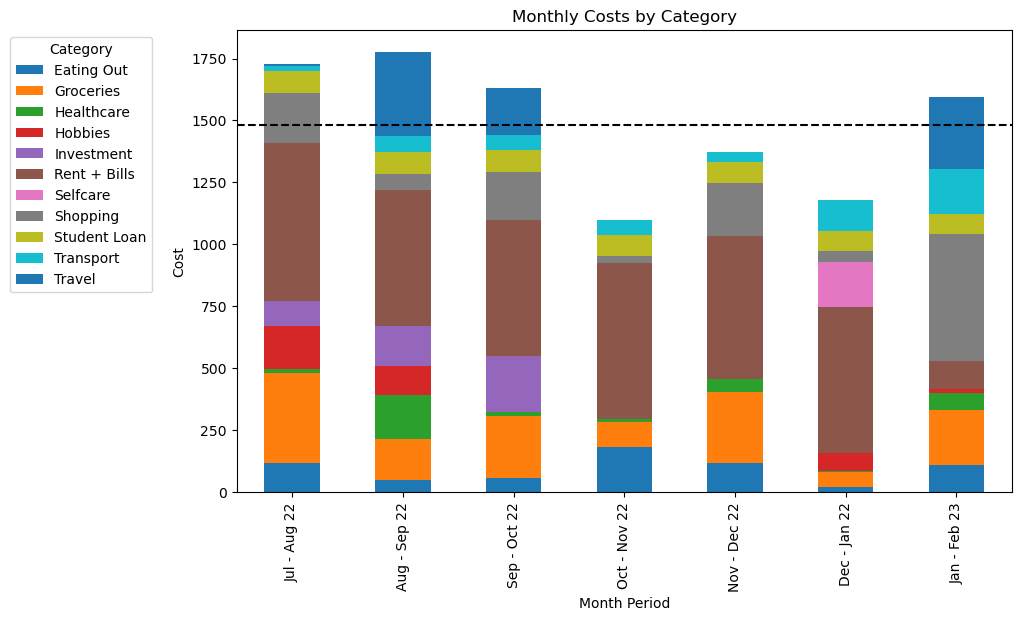

In [16]:
# Grouping by month_period and category and summing the costs, then sorting in chronological order
month_period_category_costs = df.groupby(['Month_period', 'Category'])['Cost'].sum().round(2)
month_period_category_costs = month_period_category_costs.unstack(level=-1).reindex(list(periods.keys()))

# Calculate the total cost per month period
total_cost = month_period_category_costs.sum(axis=1)

# Calculate the average cost per month period to show in a dotted line
avg_cost = total_cost.mean()

# Create a stacked bar chart
ax = month_period_category_costs.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add a dotted horizontal line at the average cost per month period
ax.axhline(y=avg_cost, color='black', linestyle='--')

# Add labels and a legend
ax.set_title('Monthly Costs by Category')
ax.set_xlabel('Month Period')
ax.set_ylabel('Cost')
ax.legend(title='Category',bbox_to_anchor=(-0.10,1))

# Show the plot
plt.show()



In [17]:
# Lineplot per category and month indicating its in-/decrease over time
df

,Category,Detail,Cost,Date,Month_period
0,Eating Out,Brunch,15.00,2022-07-25,Jul - Aug 22
1,Shopping,Uniqlo,144.50,2022-07-25,Jul - Aug 22
2,Hobbies,Salsa Class,130.00,2022-07-27,Jul - Aug 22
3,Groceries,Groceries,6.78,2022-07-27,Jul - Aug 22
4,Eating Out,Ditsch,2.00,2022-07-27,Jul - Aug 22
...,...,...,...,...,...
324,Groceries,Groceries,8.26,2023-02-21,Jan - Feb 23
325,Groceries,Groceries,27.25,2023-02-22,Jan - Feb 23
326,Groceries,Groceries,13.69,2023-02-23,Jan - Feb 23
327,Rent + Bills,Phone Norway,4.50,2023-02-24,Jan - Feb 23


In [18]:
#replace NaN, so that zero values are properly displayed
month_period_category_costs.fillna(0,inplace=True)

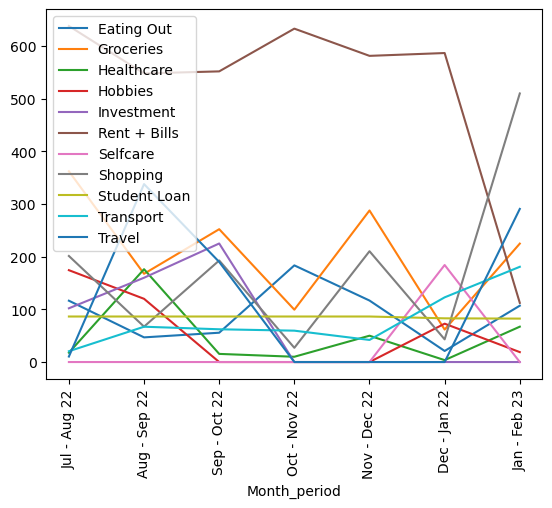

In [19]:
#get a first impressio of the montly data
for i in month_period_category_costs.columns:
    
    month_period_category_costs[i].plot()
    plt.legend(loc="upper left")
    plt.xticks(rotation=90)

In [20]:
#reset index and melt the entire dataframe
month_period_category_costs.reset_index(inplace=True)
df_moths_sum_Cat= month_period_category_costs.melt(id_vars="Month_period")

#recall the initial index
df_moths_sum_Cat.set_index("Month_period",inplace=True)

#call the unique category names
unique_Cat= df_moths_sum_Cat.Category.unique().tolist()

#reacll the index
month_period_category_costs.set_index("Month_period", inplace=True)
month_period_category_costs

#replace NaN by zero, so those are displayed
df_moths_sum_Cat.fillna(0,inplace=True)

<Figure size 640x480 with 0 Axes>

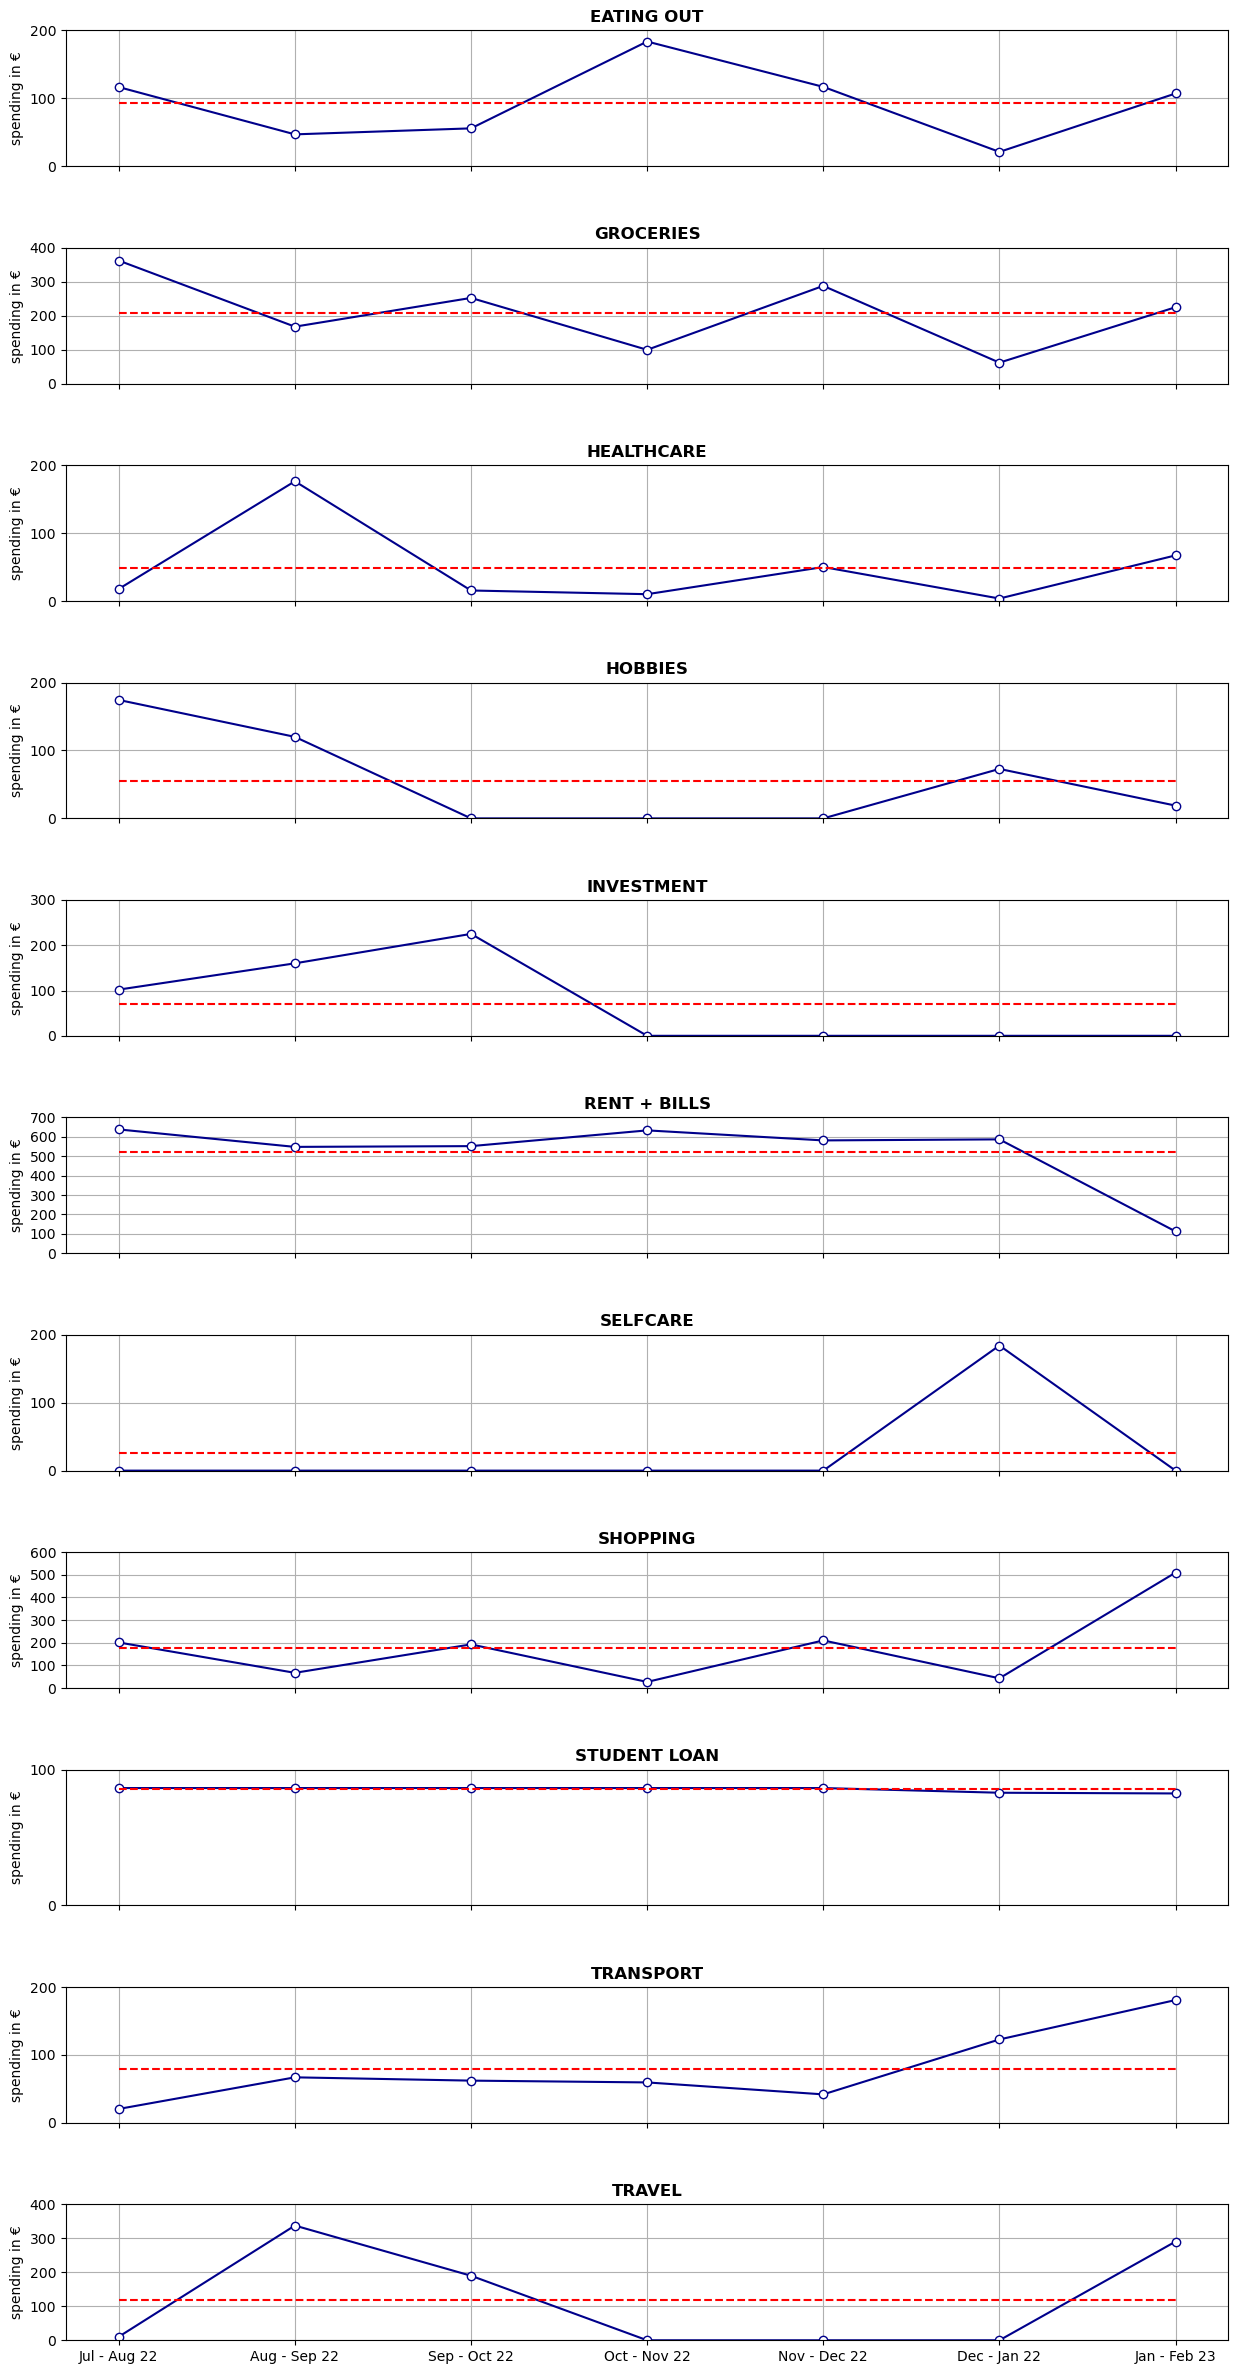

In [21]:
plt.suptitle("Spendings per months", fontsize=18, y=0.95)

fig, axs = plt.subplots(len(unique_Cat), sharex=True,figsize=(15, 30))
# loop through the length of tickers and keep track of index
for n, ticker in enumerate(unique_Cat):
    # add a new subplot iteratively
    ax = plt.subplot(len(unique_Cat),1, n + 1)

    # filter df and plot ticker on the new subplot axis
    df_moths_sum_Cat[df_moths_sum_Cat["Category"] == ticker].plot(ax=ax,marker="o",markerfacecolor="white",markeredgecolor="darkblue",color="darkblue")

    x = df_moths_sum_Cat[df_moths_sum_Cat["Category"] == unique_Cat[0]].index.to_list()  
    y = [df_moths_sum_Cat[df_moths_sum_Cat["Category"] == ticker]["value"].mean()]*len(df_moths_sum_Cat[df_moths_sum_Cat["Category"] == ticker].index)
    plt.plot(x,y,'--',color="red")

    plt.subplots_adjust(hspace = 0.6)
    plt.ylim(0, math.ceil(df_moths_sum_Cat[df_moths_sum_Cat["Category"] == ticker].value.max()/100)*100)

    #chart formatting
    ax.set_title(ticker.upper(),fontweight="bold")
    ax.set_yticks(np.arange(0,ax.get_ylim()[1]+100,100))
    ax.get_legend().remove()
    ax.grid(True)
    ax.set_xlabel("")
    ax.set_ylabel("spending in €")


In [22]:
#add a sum per month column
month_period_category_costs['sum_perMonth'] = month_period_category_costs.sum(axis=1)
month_period_category_costs

Category,Eating Out,Groceries,Healthcare,Hobbies,Investment,Rent + Bills,Selfcare,Shopping,Student Loan,Transport,Travel,sum_perMonth
Month_period,,,,,,,,,,,,
Jul - Aug 22,116.40,362.07,17.72,174.34,102.0,637.75,0.00,201.29,86.40,20.50,10.40,1728.87
Aug - Sep 22,46.80,167.50,176.19,120.00,160.0,547.78,0.00,67.15,86.40,67.02,337.71,1776.55
Sep - Oct 22,55.64,252.14,15.44,0.00,225.0,551.68,0.00,192.76,86.40,62.17,189.99,1631.22
Oct - Nov 22,183.45,99.35,10.00,0.00,0.0,632.80,0.00,27.00,86.40,59.53,0.00,1098.53
Nov - Dec 22,116.72,287.63,49.97,0.00,0.0,581.13,0.00,210.31,86.40,41.93,0.00,1374.09
Dec - Jan 22,21.00,61.61,3.62,72.82,0.0,586.50,184.17,43.03,82.95,122.77,0.00,1178.47
Jan - Feb 23,106.96,224.77,67.11,18.82,0.0,112.22,0.00,509.76,82.43,180.77,290.62,1593.46


In [23]:
# names of Categories
month_period_category_costs.columns[:-1]

Index(['Eating Out', 'Groceries', 'Healthcare', 'Hobbies', 'Investment',
       'Rent + Bills', 'Selfcare', 'Shopping', 'Student Loan', 'Transport',
       'Travel'],
      dtype='object', name='Category')

In [24]:
#add a sum column
month_period_category_costs_PER = month_period_category_costs.iloc[:, 0:-1].apply(lambda x: x / x.sum()*100,axis=1)

In [25]:
#select sum column
month_period_category_costs.iloc[:,-1]

Month_period
Jul - Aug 22    1728.87
Aug - Sep 22    1776.55
Sep - Oct 22    1631.22
Oct - Nov 22    1098.53
Nov - Dec 22    1374.09
Dec - Jan 22    1178.47
Jan - Feb 23    1593.46
Name: sum_perMonth, dtype: float64

In [26]:
#Categorical values
month_period_category_costs.columns[:-1]  # names of Categories

Index(['Eating Out', 'Groceries', 'Healthcare', 'Hobbies', 'Investment',
       'Rent + Bills', 'Selfcare', 'Shopping', 'Student Loan', 'Transport',
       'Travel'],
      dtype='object', name='Category')

In [137]:
#lists of percentage values per category and overall monthly sum
Cat_val = []
Month_sum = []

for i in range(7):
    #if month_period_category_costs_PER.iloc[i,:-1] > 0:
    Cat_val.append(month_period_category_costs_PER.iloc[i,:].to_list())
    Month_sum.append(month_period_category_costs.iloc[i,-1])

In [159]:
#call column names for all not Null values
cols = month_period_category_costs_PER.columns.values
mask = month_period_category_costs_PER.gt(0.0).values
Cat_headers = [cols[x].tolist() for x in mask]
vals = month_period_category_costs_PER.values 
Cat_val01 = []

for i in range(7):
    Cat_val01.append(vals[i][mask[i]])

In [ ]:
#Prozentangaben
Cat_val01

# Categorie
Cat_headers

#monat summe
Month_sum

In [165]:
month_period_category_costs.columns[:-1]

Index(['Eating Out', 'Groceries', 'Healthcare', 'Hobbies', 'Investment',
       'Rent + Bills', 'Selfcare', 'Shopping', 'Student Loan', 'Transport',
       'Travel'],
      dtype='object', name='Category')

In [172]:
len(Cat_val01[0]

7

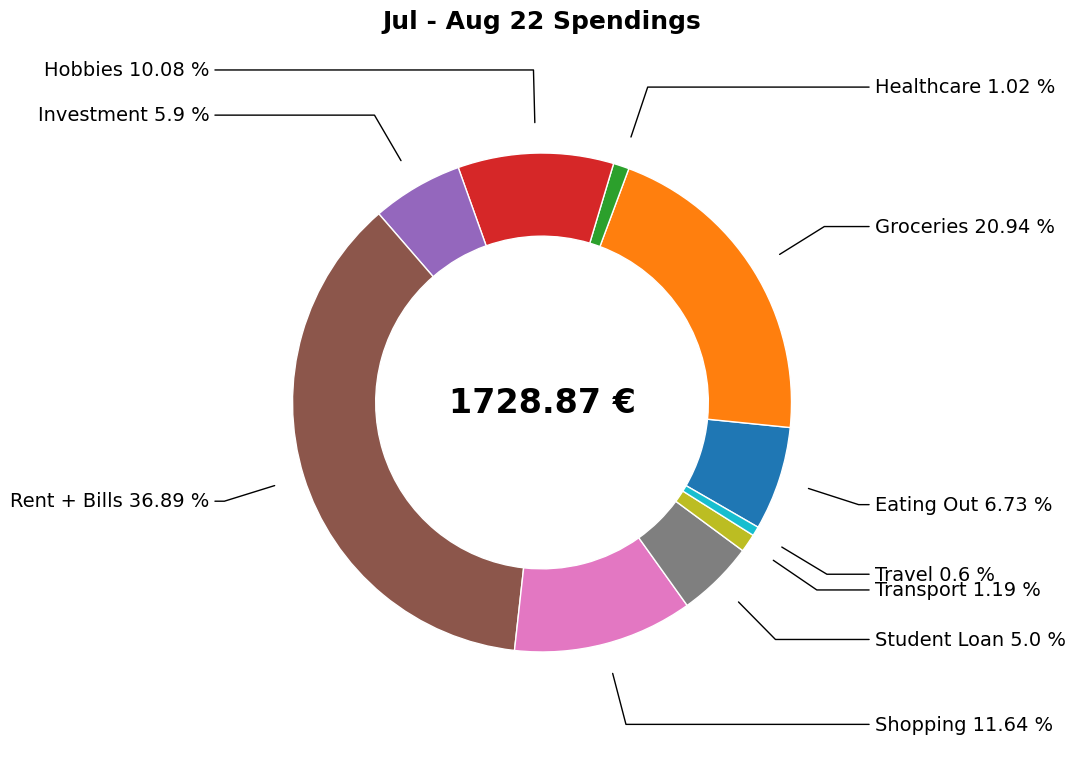

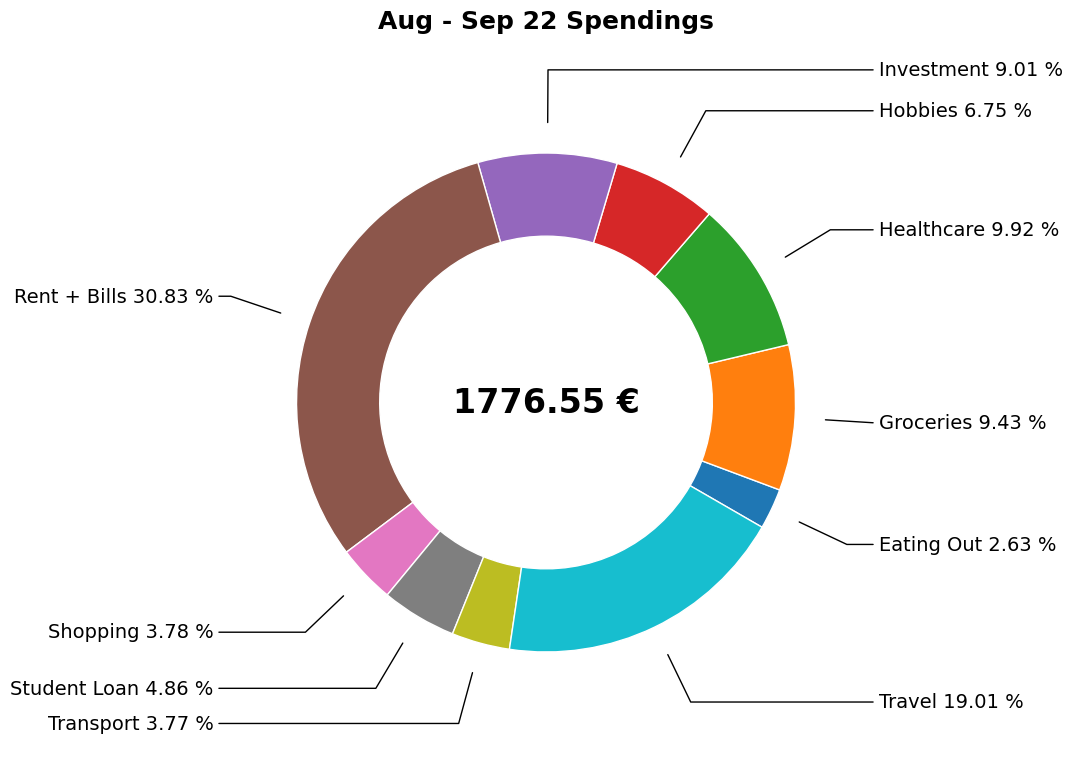

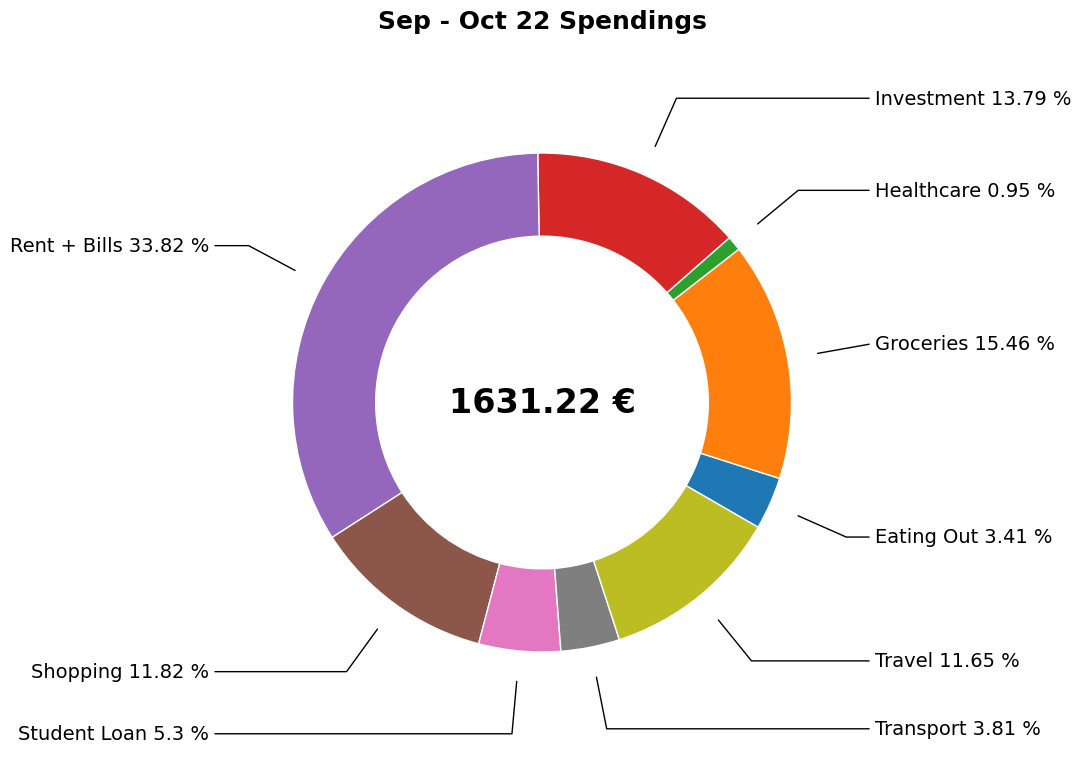

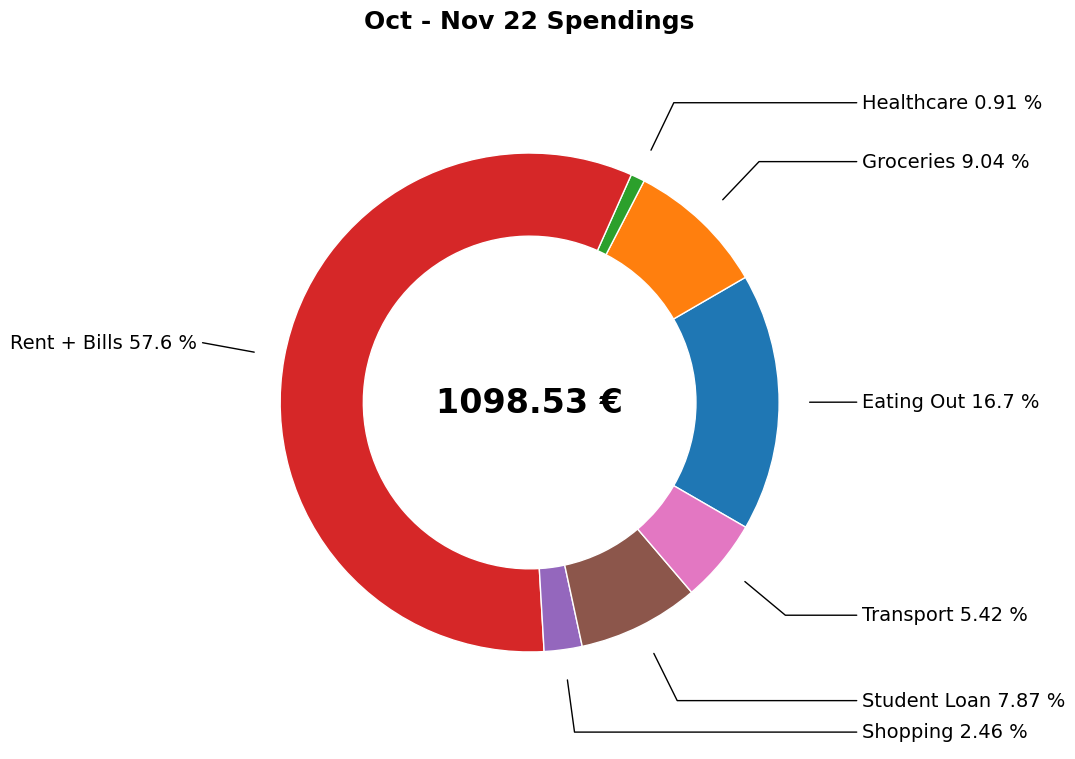

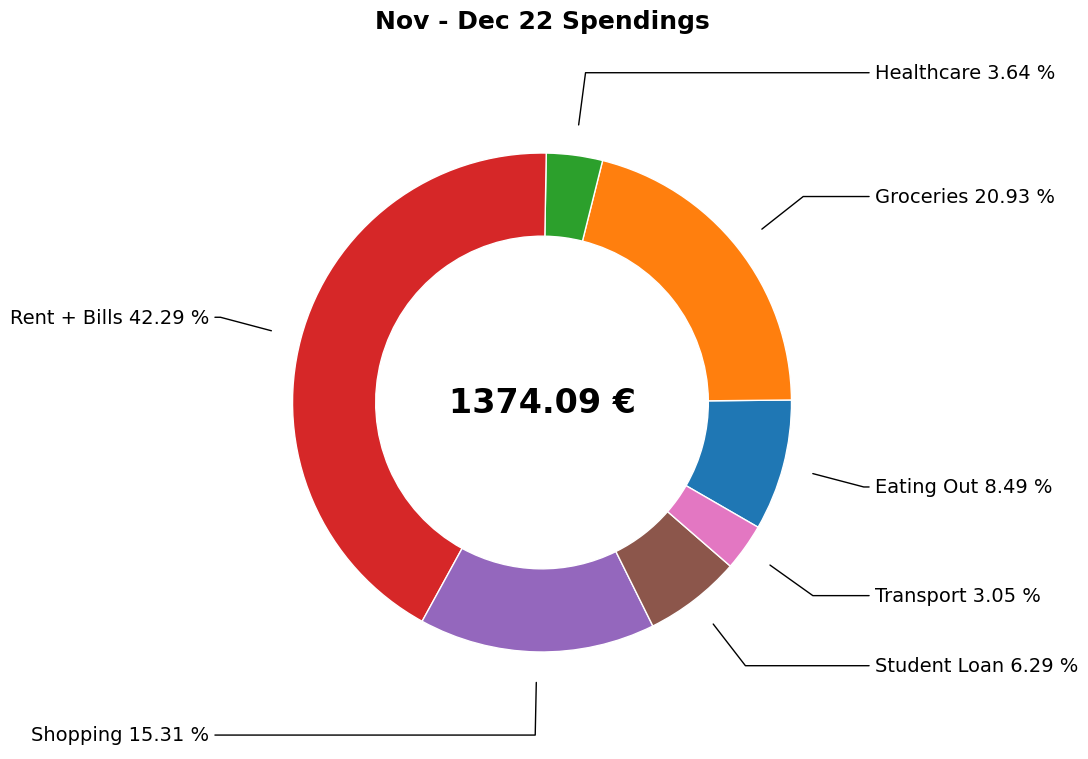

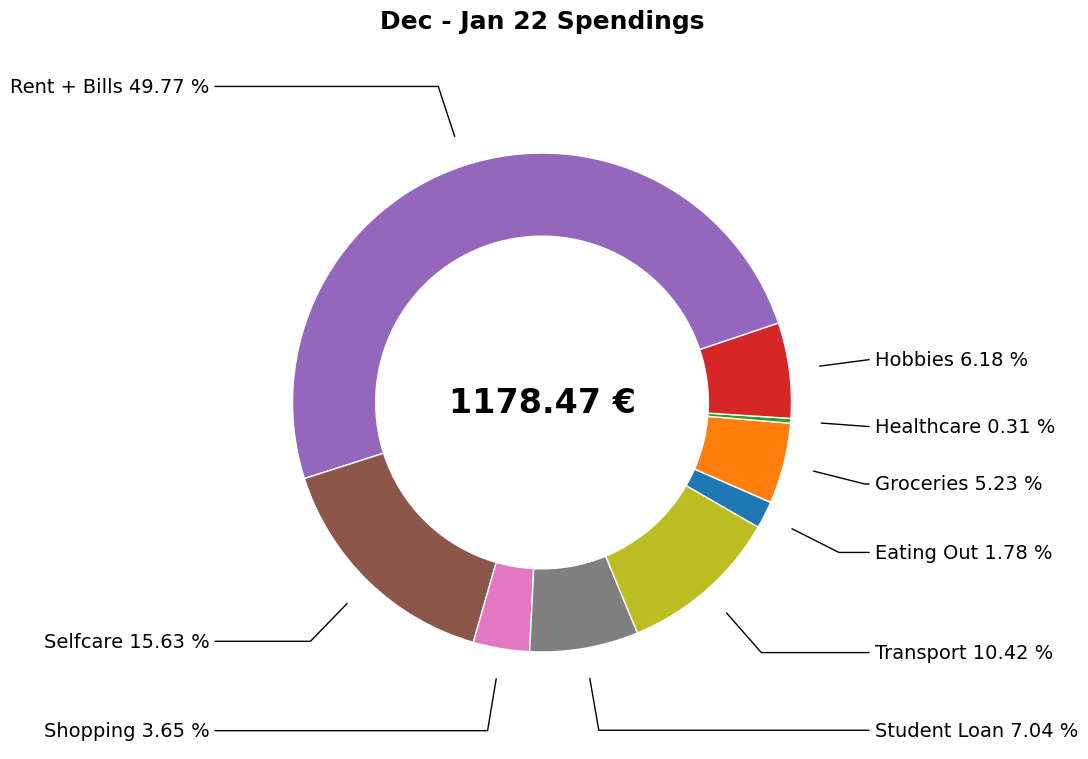

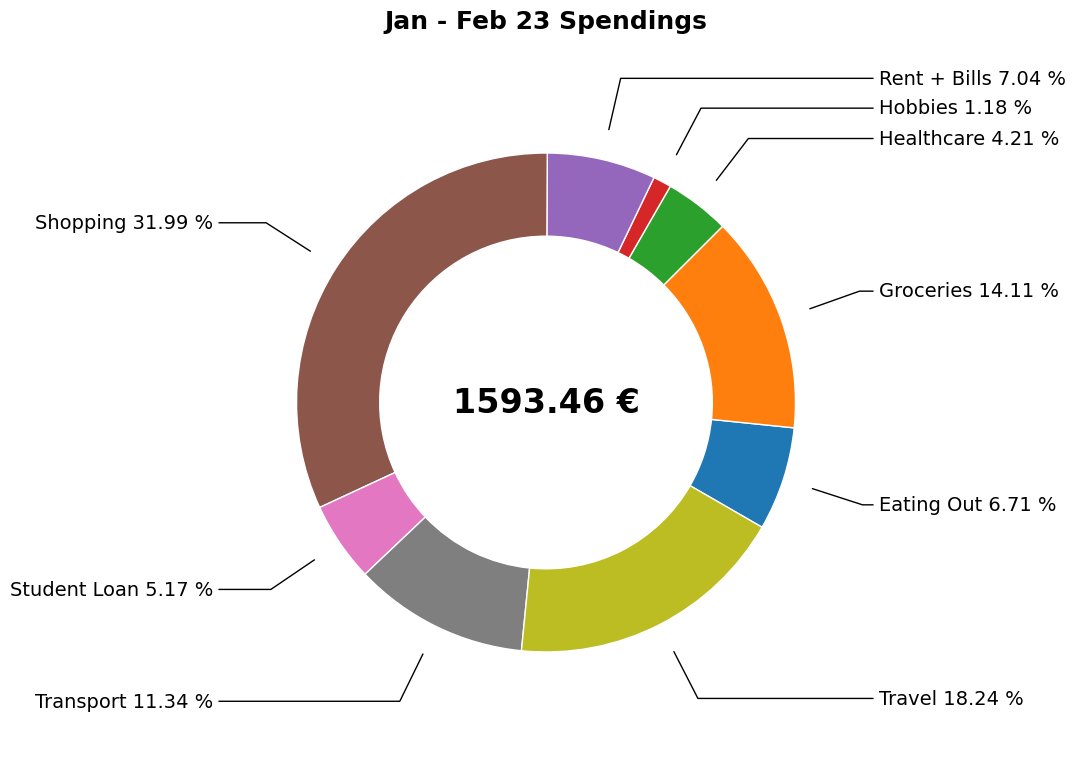

In [185]:
#we would need to get ridd of zero values indicated in the plots !!!

#Donut Pie plot to share the share in detail per month and its overall sum
for i in range(7):

    fig, ax = plt.subplots(figsize=(12,9))
    wedgeprops = {'width':0.3, 'edgecolor':'white', 'linewidth':1}
    wedges,texts = ax.pie(Cat_val01[i], wedgeprops=wedgeprops, startangle=-30, radius=0.9)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for k, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate("%s %s %s" %(Cat_headers[i][k],round(Cat_val01[i][k],2),"%"), xy=(x, y),
                    xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw, fontsize=14)

    #plt.title('September Spendings', fontsize=24, loc='center')
    plt.text(0, 0, "%s €" %(round(month_period_category_costs.iloc[:,-1][i],2)), ha='center', va='center', fontsize=24,fontweight="bold")
    plt.title("%s Spendings"%(month_period_category_costs.index.to_list()[i]),fontweight="bold",pad=20,fontsize=18)
    plt.show()

In [40]:
#adding weekday; Week referend
df
df["WeekofYear"] = df.Date.dt.week
df
df["DayofWeek"] = df.Date.dt.day_of_week
df
SumperWeekofYear = df.groupby(["WeekofYear","DayofWeek","Category"])["Cost"].sum()
SumperWeekofYear
df_SumperWeekofYear = pd.DataFrame(SumperWeekofYear)
df_SumperWeekofYear
df_SumperWeekofYear.reset_index(inplace=True)
df_SumperWeekofYear["WeekofYear"].value_counts()
filt_Week35 = (df_SumperWeekofYear["WeekofYear"]==35)
df_Week35 = df_SumperWeekofYear[filt_Week35]
df_Week35

#.to_csv("SumperWeekofYear.csv",index=False)

abr = {0: "Monday",
       1: "Tuesday",
       2: "Wednesday",
       3: "Thursday",
       4: "Friday",
       5:"Saturday",
       6:"Sunday"}

C:\Users\wasy\AppData\Local\Temp\ipykernel_18440\642093096.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["WeekofYear"] = df.Date.dt.week


In [198]:
df

,Category,Detail,Cost,Date,Month_period,WeekofYear,DayofWeek,Day_of_Week_Category,Month
0,Eating Out,Brunch,15.00,2022-07-25,Jul - Aug 22,30,0,Weekday,7
1,Shopping,Uniqlo,144.50,2022-07-25,Jul - Aug 22,30,0,Weekday,7
2,Hobbies,Salsa Class,130.00,2022-07-27,Jul - Aug 22,30,2,Weekday,7
3,Groceries,Groceries,6.78,2022-07-27,Jul - Aug 22,30,2,Weekday,7
4,Eating Out,Ditsch,2.00,2022-07-27,Jul - Aug 22,30,2,Weekday,7
...,...,...,...,...,...,...,...,...,...
324,Groceries,Groceries,8.26,2023-02-21,Jan - Feb 23,8,1,Weekday,2
325,Groceries,Groceries,27.25,2023-02-22,Jan - Feb 23,8,2,Weekday,2
326,Groceries,Groceries,13.69,2023-02-23,Jan - Feb 23,8,3,Weekday,2
327,Rent + Bills,Phone Norway,4.50,2023-02-24,Jan - Feb 23,8,4,Weekday,2


In [41]:
#df_Week35["Dayname"] = abr[df_Week35]
df_Week35['DayofWeek'] = df_Week35['DayofWeek'].replace(abr)
df_Week35
df_Week35.groupby("DayofWeek")["Cost"].sum().mean()
df_Week35.to_csv("SumperWeekofYear_Week35.csv",index=False)
df_Week35.groupby("Category")["Cost"].sum().sort_values(ascending=False).to_csv("SumValuesSorted_Week35.csv")
SumperWeekofYear.to_csv("SumperWeekofYear.csv")

C:\Users\wasy\AppData\Local\Temp\ipykernel_18440\2894817799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Week35['DayofWeek'] = df_Week35['DayofWeek'].replace(abr)


In [188]:
df_Week35.groupby("DayofWeek")["Cost"].sum().mean()

117.58999999999999

In [197]:
type(df_Week35.WeekofYear[116])

numpy.int64

In [42]:
df

,Category,Detail,Cost,Date,Month_period,WeekofYear,DayofWeek
0,Eating Out,Brunch,15.00,2022-07-25,Jul - Aug 22,30,0
1,Shopping,Uniqlo,144.50,2022-07-25,Jul - Aug 22,30,0
2,Hobbies,Salsa Class,130.00,2022-07-27,Jul - Aug 22,30,2
3,Groceries,Groceries,6.78,2022-07-27,Jul - Aug 22,30,2
4,Eating Out,Ditsch,2.00,2022-07-27,Jul - Aug 22,30,2
...,...,...,...,...,...,...,...
324,Groceries,Groceries,8.26,2023-02-21,Jan - Feb 23,8,1
325,Groceries,Groceries,27.25,2023-02-22,Jan - Feb 23,8,2
326,Groceries,Groceries,13.69,2023-02-23,Jan - Feb 23,8,3
327,Rent + Bills,Phone Norway,4.50,2023-02-24,Jan - Feb 23,8,4


In [43]:
# create a list of weekday conditions
conditions = [(df['DayofWeek'] <= 4),(df['DayofWeek'] > 4)]

# create a list of the values to be assigned
values = ['Weekday', 'Weekend']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Day_of_Week_Category'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Category,Detail,Cost,Date,Month_period,WeekofYear,DayofWeek,Day_of_Week_Category
0,Eating Out,Brunch,15.00,2022-07-25,Jul - Aug 22,30,0,Weekday
1,Shopping,Uniqlo,144.50,2022-07-25,Jul - Aug 22,30,0,Weekday
2,Hobbies,Salsa Class,130.00,2022-07-27,Jul - Aug 22,30,2,Weekday
3,Groceries,Groceries,6.78,2022-07-27,Jul - Aug 22,30,2,Weekday
4,Eating Out,Ditsch,2.00,2022-07-27,Jul - Aug 22,30,2,Weekday


In [44]:
#adding a month column
df["Month"] = df.Date.dt.month

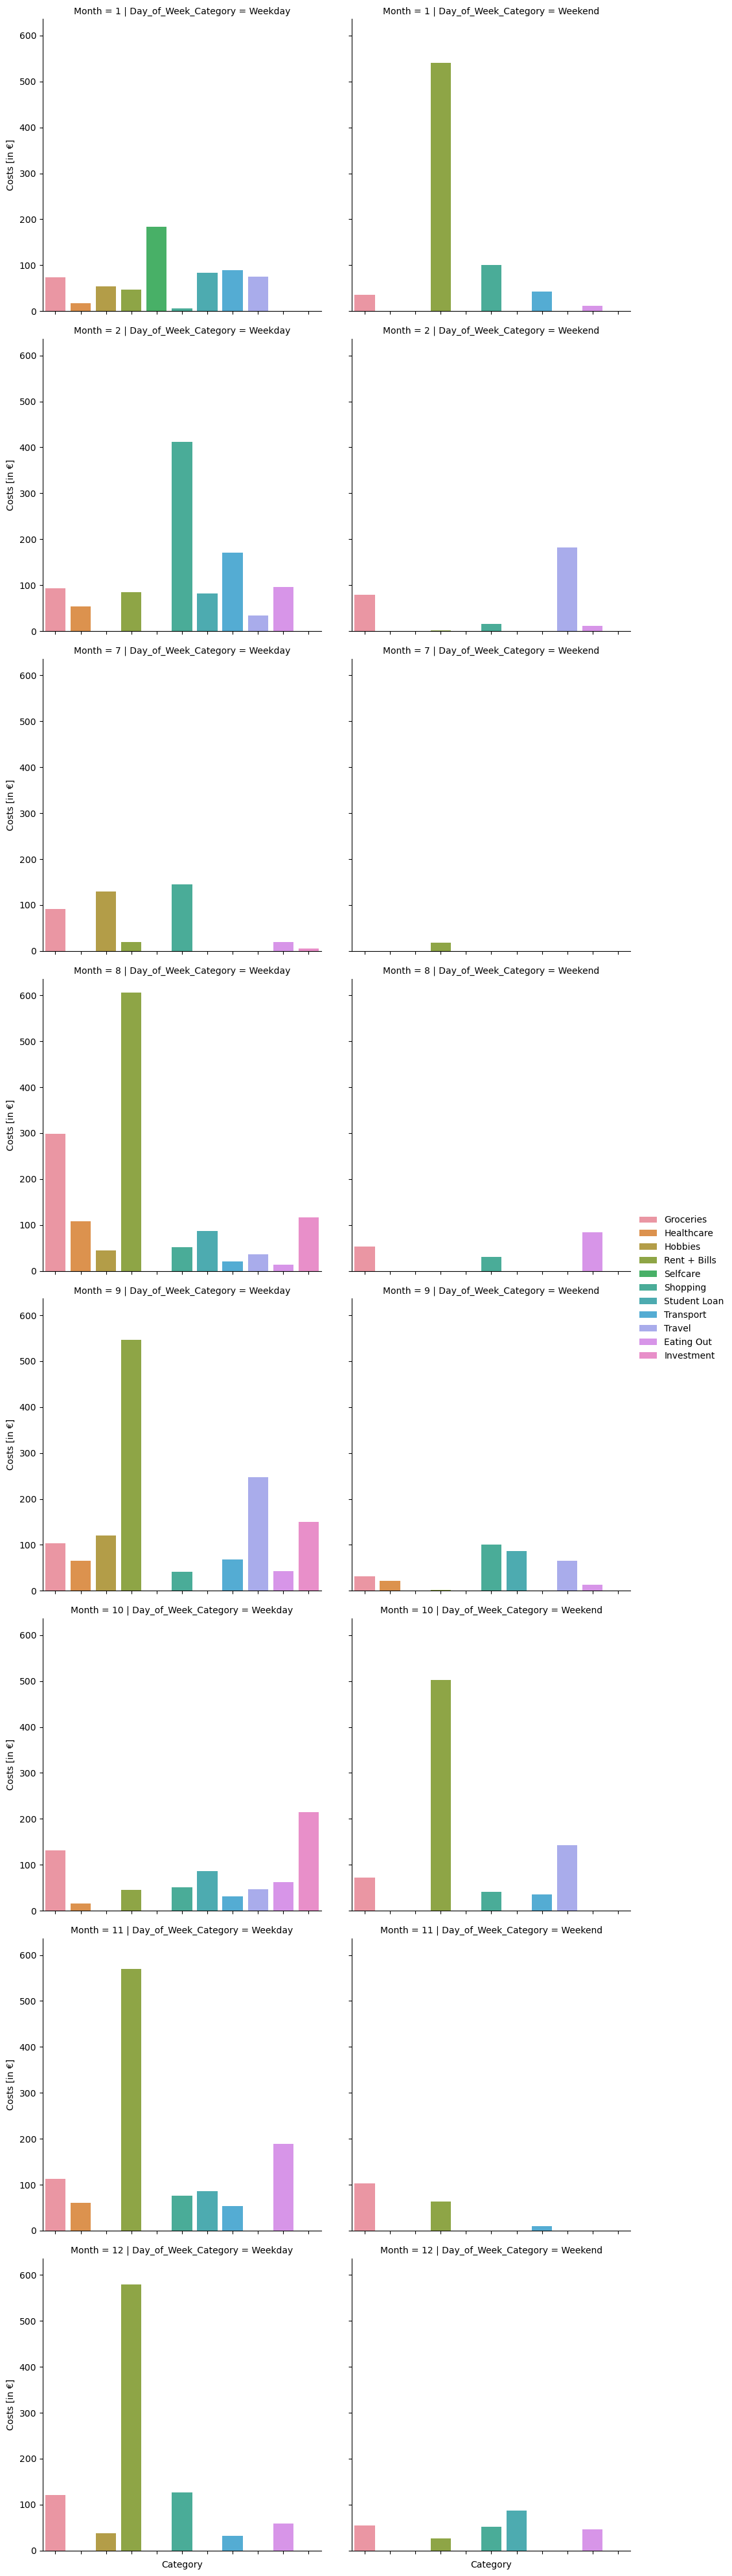

In [45]:
#taking a look onto the distribution of spendings comparing weekdays to weekend
#groupby Month and Category
dseries = pd.DataFrame(df.groupby(["Month","Day_of_Week_Category","Category"])["Cost"].sum())
dseries.reset_index(inplace=True)
dseries.Month.unique()
g = sns.catplot(dseries, x="Category", y="Cost", hue="Category", row="Month",col="Day_of_Week_Category", kind="bar",dodge=False)
#ax.bar_label(ax.containers[0], labels=tb, padding=3)
for i in range(8):
    g.axes[i,0].set_ylabel("Costs [in €]")

g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.add_legend()